In [1]:
from tensorflow.keras.models import load_model
from clean import downsample_mono, envelope
from kapre.time_frequency import STFT, Magnitude, ApplyFilterbank, MagnitudeToDecibel
from sklearn.preprocessing import LabelEncoder
import numpy as np
from glob import glob
import argparse
import os
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import f1_score

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Predict Real-world data based on clean-data trained model

In [4]:
model = load_model("npy_augmented_real/lstm_overlapping_4_8k_40k.h5")
test_paths1 = glob('{}/**'.format("npy_augmented_real/hairdryer_washbasin_8k_40k/"), recursive=True)
test_paths2 = glob('{}/**'.format("npy_augmented_real/hood_faucet_8k_40k/"), recursive=True)
test_paths = test_paths1 + test_paths2
test_paths = [x.replace(os.sep, '/') for x in test_paths if 'Test' in x]
print(test_paths)
test_data = []
y_true_labels = []
for i in test_paths:
    #print(np.load(i).shape)
    test_data.append(np.abs(np.load(i)))
    cur_cls = os.path.split(i)[-1].split('_')[1]
    cur_label = [cur_cls for i in range(np.load(i).shape[0])]
    y_true_labels += cur_label
test_data = np.stack(test_data)
y_true_labels = np.stack(y_true_labels)
test_data = test_data.reshape(test_data.shape[0]*test_data.shape[1],test_data.shape[2],test_data.shape[3],1)
print(test_data.shape)
for i in range(test_data.shape[0]):
    test_data[i] /= test_data[i].max()

['npy_augmented_real/hairdryer_washbasin_8k_40k/Real_hairdryer_Test.npy', 'npy_augmented_real/hairdryer_washbasin_8k_40k/Real_washbasin_Test.npy', 'npy_augmented_real/hood_faucet_8k_40k/Real_faucet_Test.npy', 'npy_augmented_real/hood_faucet_8k_40k/Real_hood_Test.npy']
(320, 23, 641, 1)


In [6]:
cls = sorted(set(y_true_labels))
y_pred = model.predict(test_data)
y_pred_le = np.argmax(y_pred,axis=1)
y_pred_labels = [cls[i] for i in y_pred_le]

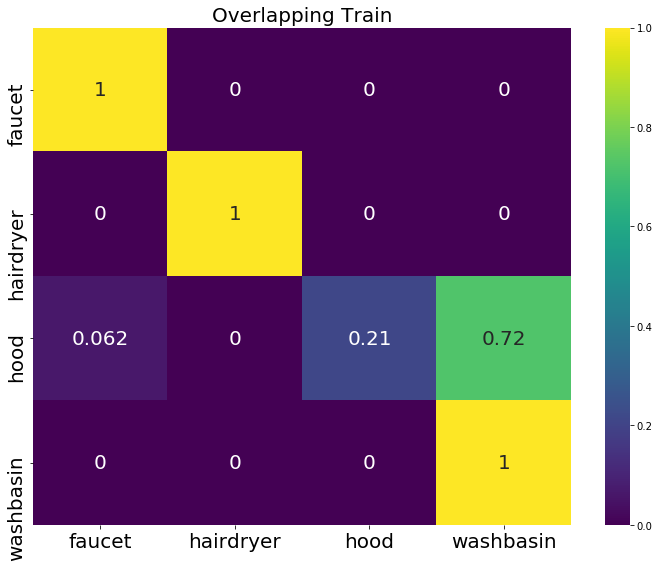

In [9]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Overlapping Train',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis',annot_kws={"size": 20})
fig = hm.get_figure()
fig.savefig("Confusion_Only_Overlapping.jpg",dpi=100)
plt.show()

## Predict Real-world data based on augmented-data trained model

In [3]:
model = load_model("npy_augmented_real/hood_faucet/lstm_overlapping.h5")
test_paths = glob('{}/**'.format("npy_augmented_real/hood_faucet/"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if 'Test' in x])
print(test_paths)
test_L = np.abs(np.load(test_paths[0]))
label_L = np.stack(["faucet" for i in range(test_L.shape[0])])
test_R = np.abs(np.load(test_paths[1]))
label_R = np.stack(["hood" for i in range(test_R.shape[0])])
test_data = np.concatenate((test_L,test_R),axis=0)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)
y_true_labels = np.concatenate((label_L,label_R))
print(y_true_labels.shape)
for i in range(test_data.shape[0]):
    test_data[i] /= test_data[i].max()

['npy_augmented_real/hood_faucet/Real_faucet_Test.npy', 'npy_augmented_real/hood_faucet/Real_hood_Test.npy']
(160, 23, 381, 1)
(160,)


In [4]:
cls = sorted(set(y_true_labels))
y_pred = model.predict(test_data)
y_pred_le = np.argmax(y_pred,axis=1)
y_pred_labels = [cls[i] for i in y_pred_le]
print(cls)

['faucet', 'hood']


In [5]:
print(y_pred_labels)

['faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'faucet', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood', 'hood',

In [6]:
print(y_true_labels)

['faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet' 'faucet'
 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood'
 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood'
 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood'
 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 'hood' 

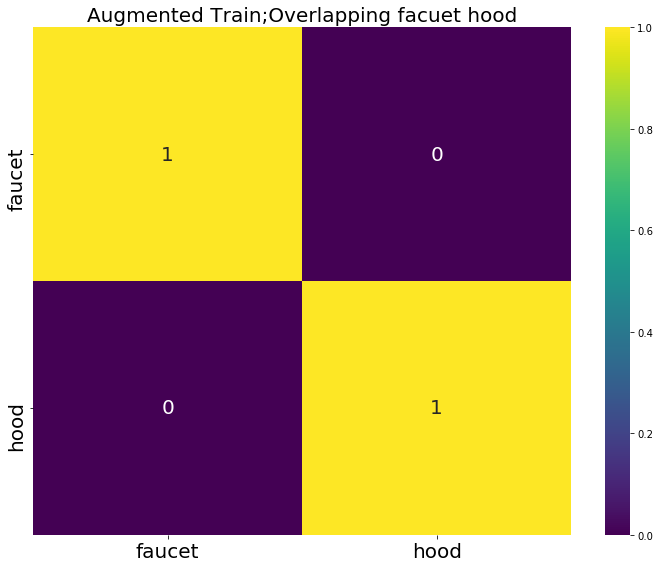

In [7]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Augmented Train;Overlapping facuet hood',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis',annot_kws={"size": 20})
fig = hm.get_figure()
fig.savefig("Confusion_Only_Overlapping.jpg",dpi=100)
plt.show()

## Only for random test

In [6]:
model = load_model("models/conv2d_ultarmic_4.h5")
src_paths = "npy_overlapping/rough_ica.npy"
src = np.load(src_paths)
src = src.reshape(*src.shape,1)
src1 = src[:,0,1:-1,:,:]
src2 = src[:,1,1:-1,:,:]
re1 = model.predict(src1)
re_pred_idx = np.argmax(re1,axis=1)

In [7]:
re_pred_labels = [cls[i] for i in re_pred_idx]
print(re_pred_idx)

[2 0 0 2 0 2 2 2 2 0 2 0 2 0 0 1 1 1]


In [8]:
re2 = model.predict(src2)
re_pred_idx = np.argmax(re2,axis=1)
re_pred_labels = [cls[i] for i in re_pred_idx]
print(re_pred_idx)

[0 2 2 0 2 2 2 2 2 0 0 2 0 2 2 1 2 1]


In [9]:
cls

['Cello', 'Clarinet', 'Flute', 'None']

## Check GSC performance

In [5]:
model = load_model("models/conv2d_ultarmic_4.h5")
src_paths = glob('{}/**'.format("npy_overlapping"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in src_paths if ('GSC' in x) and ('label' not in x)])
label_paths = sorted([x.replace(os.sep, '/') for x in src_paths if ('GSC_label' in x)])
test_data = np.load(test_paths[0])
test_data = test_data[:,2:-1,:]
y_true_labels = np.load(label_paths[0])
print(test_data.shape)
cls = sorted(set(y_true_labels))
cls.append('None')
le = LabelEncoder()
le.fit(cls)
test_data = test_data.reshape(*test_data.shape,1)
print(test_data.shape)
y_pred = model.predict(test_data)
y_pred_idx = np.argmax(y_pred,axis=1)
y_pred_labels = [cls[i] for i in y_pred_idx]

(130, 48, 1921)
(130, 48, 1921, 1)


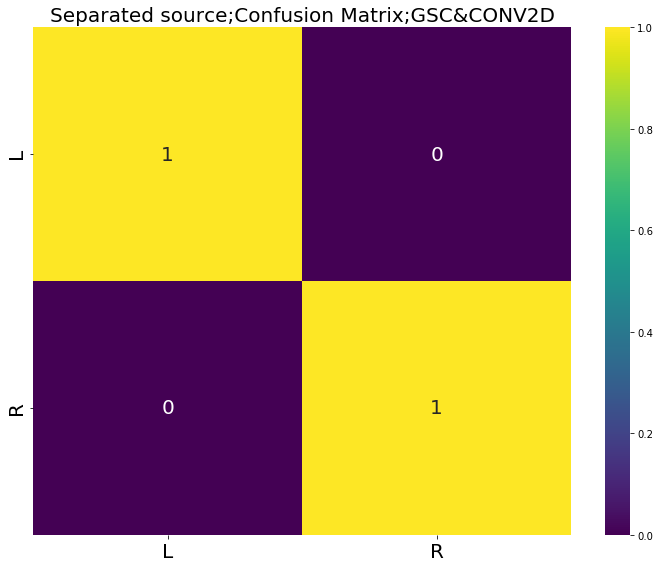

In [15]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Separated source;Confusion Matrix;GSC&CONV2D',fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis',annot_kws={"size": 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = hm.get_figure()
#fig.savefig("Separated_cm_conv2d_4_GSC.jpg",dpi=100)
plt.show()

## Only read data but no label npy

In [4]:
model = load_model("models/conv2d_ultarmic_4.h5")
test_paths = glob('{}/**'.format("npy_overlapping"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if '.npy' in x])

wav_paths = glob('{}/**'.format("npy_files"), recursive=True)
wav_paths = sorted([x.replace(os.sep, '/') for x in wav_paths if ('Test_with' in x)])
print(wav_paths)
labels = np.load(wav_paths[1])
cls = sorted(set(labels))

le = LabelEncoder()
le.fit(cls)

y_pred_labels = []
y_true_labels = []
for path in test_paths:
    test_data = np.load(path)
    assert(test_data.dtype == np.complex64)
    num_instance = test_data.shape[0]
    dim_instance = test_data.shape[1:]
    #print("Number of Testing instance for each object:",num_instance)
    #print("Dimension of each instance:",dim_instance)
    test_data = test_data.reshape((*test_data.shape,1))
    test_data = test_data[:,1:-1,:,:]
    print(test_data.shape)
    assert(test_data.shape[1]==48 and test_data.shape[2]==1921)
    cur_label = os.path.split(path)[-1].split("_")[1]
    mix_with = os.path.split(path)[-1].split("_")[2].split(".")[0]
    print("cur_label:",cur_label," ",str(le.transform([cur_label])),"Mixed with:",mix_with," ",str(le.transform([mix_with])))
    y_pred = model.predict(test_data)
    y_pred_le = np.argmax(y_pred,axis=1)
    print(y_pred_le)
    for i in range(len(y_pred_le)):
        y_pred_labels.append(cls[y_pred_le[i]])
        y_true_labels.append(cur_label)

['npy_files/Test_with_4.npy', 'npy_files/Test_with_4_label.npy']
(18, 48, 1921, 1)
cur_label: Cello   [0] Mixed with: Clarinet   [1]
[2 0 0 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2]
(18, 48, 1921, 1)
cur_label: Cello   [0] Mixed with: Flute   [2]
[2 2 0 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0]
(18, 48, 1921, 1)
cur_label: Clarinet   [1] Mixed with: Cello   [0]
[2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 1 0]
(29, 48, 1921, 1)
cur_label: Clarinet   [1] Mixed with: Flute   [2]
[2 2 2 2 0 2 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 1 1 2]
(18, 48, 1921, 1)
cur_label: Flute   [2] Mixed with: Cello   [0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
(29, 48, 1921, 1)
cur_label: Flute   [2] Mixed with: Clarinet   [1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


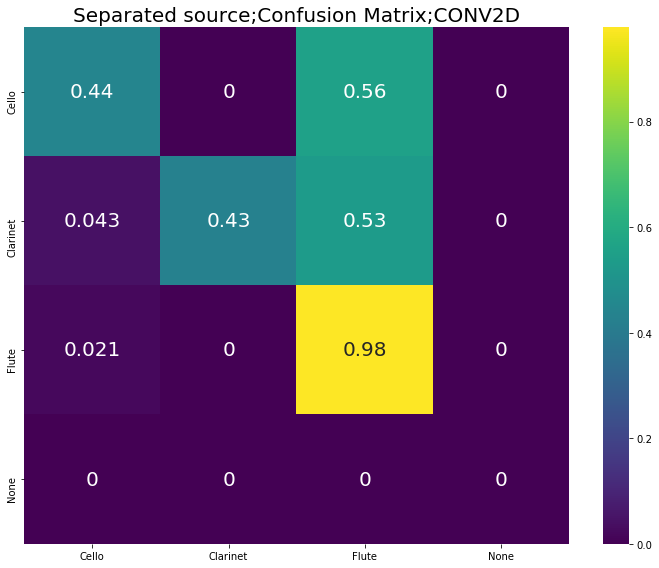

In [6]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Separated source;Confusion Matrix;CONV2D',fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis',annot_kws={"size": 20})
fig = hm.get_figure()    
#fig.savefig("Separated_cm_conv2d_4.jpg",dpi=100)
plt.show()

In [10]:
f1_score(y_true_labels, y_pred_labels, average='micro')

0.6307692307692307

In [15]:
model = load_model("models/conv2d_ultarmic_4.h5")
test_paths = glob('{}/**'.format("npy_files"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if ('Test_with' in x)])
print(test_paths)
test_data = np.abs(np.load(test_paths[0]))
assert(test_data.dtype != np.complex64)
print(test_data.dtype)
print(test_data.shape)
num_instance = test_data.shape[0]
dim_instance = test_data.shape[1:]
print("Number of Testing instance for each object:",num_instance)
print("Dimension of each instance:",dim_instance)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)

['npy_files/Test_with_4.npy', 'npy_files/Test_with_4_label.npy']
float32
(104, 48, 1921)
Number of Testing instance for each object: 104
Dimension of each instance: (48, 1921)
(104, 48, 1921, 1)


In [16]:
labels = np.load(test_paths[1])
le = LabelEncoder()
y_true = le.fit_transform(labels)
print(y_true)
y_pred = model.predict(test_data)
y_pred_le = np.argmax(y_pred,axis=1)
cls = sorted(set(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [17]:
model.predict(test_data[99:102])

array([[1.0776753e-03, 1.0360398e-03, 1.9069141e-03, 9.9597931e-01],
       [8.0212043e-04, 1.0873864e-03, 1.1336420e-03, 9.9697685e-01],
       [8.8308821e-04, 1.0029995e-03, 9.8417816e-04, 9.9712974e-01]],
      dtype=float32)

In [18]:
y_pred_labels = [cls[x] for x in y_pred_le]
y_true_labels = [cls[x] for x in y_true]

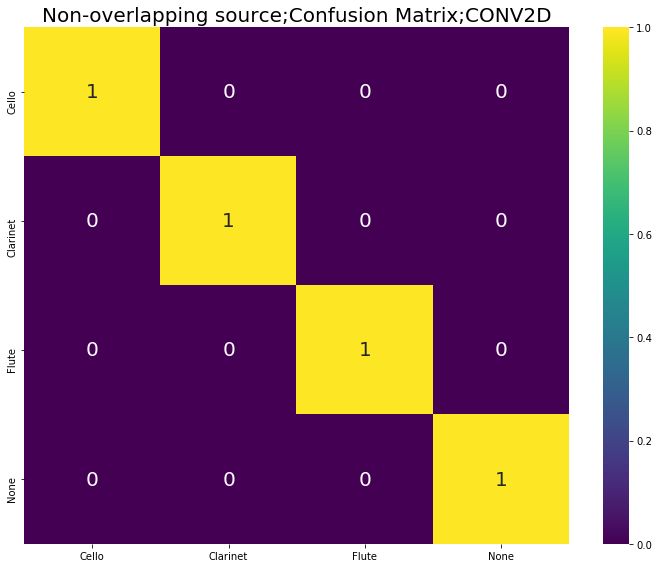

In [19]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Non-overlapping source;Confusion Matrix;CONV2D',fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis',annot_kws={"size": 20})
fig = hm.get_figure()    
fig.savefig("nonlap_cm_conv2d_4.jpg",dpi=100)
plt.show()

In [65]:
model = load_model("models/lstm_ultarmic.h5")
npy_paths = glob('{}/**'.format("npy_files_predict"), recursive=True)
npy_paths = sorted([x.replace(os.sep, '/') for x in npy_paths if 'DASICA.npy' in x])
test_data = []
for path in npy_paths:
    test_data.append(np.load(path))
test_data = np.stack(test_data)
print(test_data.shape)
num_object = test_data.shape[0]
num_instance = test_data.shape[1]
dim_instance = test_data.shape[2:]
print("Number of Testing Object:",num_object)
print("Number of Testing instance for each object:",num_instance)
print("Dimension of each instance:",dim_instance)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)

(2, 100, 36, 234)
Number of Testing Object: 2
Number of Testing instance for each object: 100
Dimension of each instance: (36, 234)
(2, 100, 36, 234, 1)


In [66]:
classes = sorted(os.listdir("npy_files_predict"))
le = LabelEncoder()
le.fit(classes)
print(classes)
labels = []
for i in range(num_object):
    for j in range(num_instance):
        labels.append(classes[i])
y_true = le.fit_transform(labels)
print(y_true)

['Drill', 'Drill_Test1.npy', 'Shaver']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [71]:
y_pred = model.predict(test_data[1,:,:,:,:])

In [72]:
y_mean = np.mean(y_pred, axis=0)
print(y_mean)

[0.99421227 0.00578771]


In [69]:
train_data = np.load("stft_object_clipping.npy")
train_data = train_data.reshape((*train_data.shape,1))
print(train_data.shape)

(2, 300, 36, 234, 1)


In [70]:
y_pred = model.predict(train_data[1,:,:,:,:])
y_mean = np.mean(y_pred, axis=0)
print(y_mean)

[0.00108265 0.9989175 ]
